In [1]:
# Celda 1: Importar librerías (Asegúrate de tenerlas)
import os
import pandas as pd
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Celda 2: Configuración Inicial
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
sns.set_theme(style="whitegrid") # Estilo de Seaborn
plt.rcParams['figure.figsize'] = (10, 5) # Tamaño por defecto para gráficos individuales
plt.rcParams['figure.facecolor'] = 'white' # Fondo blanco para las figuras

In [3]:
# Celda 3: Cargar Variables de Entorno y Definir Constantes para SPOTIFY
logging.info("Cargando variables de entorno para la conexión a la base de datos...")
dotenv_path = '/home/nicolas/Escritorio/workshops/workshop_2/env/.env' # <-- CONFIRMA ESTA RUTA
load_dotenv(dotenv_path=dotenv_path)

DB_USER = os.getenv('POSTGRES_USER')
DB_PASSWORD = os.getenv('POSTGRES_PASSWORD')
DB_HOST = os.getenv('POSTGRES_HOST')
DB_PORT = os.getenv('POSTGRES_PORT')
DB_NAME = os.getenv('POSTGRES_DB') # Base de datos 'artists'
TABLE_NAME = 'spotify_dataset'     # <-- Tabla con datos de Spotify

if not all([DB_USER, DB_PASSWORD, DB_HOST, DB_PORT, DB_NAME]):
    logging.error("Faltan variables de entorno para la base de datos en " + dotenv_path)
    raise ValueError("Variables de entorno incompletas.")

2025-04-11 12:29:06,131 - INFO - Cargando variables de entorno para la conexión a la base de datos...


In [4]:
# Celda 4: Crear Engine de SQLAlchemy
engine = None
try:
    logging.info(f"Creando motor SQLAlchemy para la base de datos '{DB_NAME}'...")
    db_url = f'postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'
    engine = create_engine(db_url)
    logging.info(f"Motor SQLAlchemy creado exitosamente.")
except Exception as e:
    logging.error(f"Error al crear el motor SQLAlchemy: {e}")
    raise

2025-04-11 12:29:06,138 - INFO - Creando motor SQLAlchemy para la base de datos 'artists'...
2025-04-11 12:29:06,160 - INFO - Motor SQLAlchemy creado exitosamente.


In [5]:
# Celda 5: Cargar Datos de Spotify desde PostgreSQL
df_spotify = None # Usar un nombre diferente para el DataFrame
if engine:
    try:
        logging.info(f"Leyendo datos desde la tabla '{TABLE_NAME}'...")
        # Usar comillas dobles por si el nombre de tabla tiene mayúsculas o caracteres especiales
        query = f'SELECT * FROM "{TABLE_NAME}"'

        # Cargar los datos en el nuevo DataFrame
        df_spotify = pd.read_sql_query(query, con=engine)
        logging.info(f"Datos cargados exitosamente desde la tabla '{TABLE_NAME}' en df_spotify. Filas: {len(df_spotify)}")

    except Exception as e:
        logging.error(f"Error al conectar a la base de datos o leer la tabla '{TABLE_NAME}': {e}")
        raise # Detener si la carga falla
else:
    logging.error("No se pudo crear el engine. No se pueden cargar los datos.")
    raise ValueError("Engine no disponible.")

2025-04-11 12:29:06,167 - INFO - Leyendo datos desde la tabla 'spotify_dataset'...
2025-04-11 12:29:10,924 - INFO - Datos cargados exitosamente desde la tabla 'spotify_dataset' en df_spotify. Filas: 40000


In [6]:
# Celda 6: Vista rápida de la estructura y contenido del DataFrame
if df_spotify is not None:
    logging.info("--- 4. Vista rápida de la tabla Spotify (primeras filas) ---")
    display(df_spotify.head())

    logging.info("\n--- Información general del DataFrame Spotify ---")
    # df.info() imprime directamente, no necesita display()
    df_spotify.info()
else:
    logging.warning("El DataFrame df_spotify no se cargó. Saltando EDA.")

2025-04-11 12:29:10,932 - INFO - --- 4. Vista rápida de la tabla Spotify (primeras filas) ---


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


2025-04-11 12:29:10,948 - INFO - 
--- Información general del DataFrame Spotify ---


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          40000 non-null  object 
 1   artists           40000 non-null  object 
 2   album_name        40000 non-null  object 
 3   track_name        40000 non-null  object 
 4   popularity        40000 non-null  int64  
 5   duration_ms       40000 non-null  int64  
 6   explicit          40000 non-null  bool   
 7   danceability      40000 non-null  float64
 8   energy            40000 non-null  float64
 9   key               40000 non-null  int64  
 10  loudness          40000 non-null  float64
 11  mode              40000 non-null  int64  
 12  speechiness       40000 non-null  float64
 13  acousticness      40000 non-null  float64
 14  instrumentalness  40000 non-null  float64
 15  liveness          40000 non-null  float64
 16  valence           40000 non-null  float6

In [7]:
# Celda 7: Mostrar tipos de datos por columna
if df_spotify is not None:
    logging.info("\n--- 5. Tipos de datos por columna (dtypes) ---")
    display(df_spotify.dtypes)

2025-04-11 12:29:10,968 - INFO - 
--- 5. Tipos de datos por columna (dtypes) ---


track_id           object
artists            object
album_name         object
track_name         object
popularity          int64
                   ...   
liveness          float64
valence           float64
tempo             float64
time_signature      int64
track_genre        object
Length: 20, dtype: object

In [8]:
# Celda 8: Ver cantidad total de filas y columnas
if df_spotify is not None:
    logging.info("\n--- 6. Dimensiones del DataFrame (filas, columnas) ---")
    num_filas, num_columnas = df_spotify.shape
    print(f"Número total de filas: {num_filas}")
    print(f"Número total de columnas: {num_columnas}")

2025-04-11 12:29:10,978 - INFO - 
--- 6. Dimensiones del DataFrame (filas, columnas) ---


Número total de filas: 40000
Número total de columnas: 20


In [9]:
# Celda 9: Ver número de filas duplicadas
if df_spotify is not None:
    logging.info("\n--- 7. Conteo de filas duplicadas ---")
    num_duplicados = df_spotify.duplicated().sum()
    print(f"Número de filas completamente duplicadas: {num_duplicados}")

2025-04-11 12:29:10,987 - INFO - 
--- 7. Conteo de filas duplicadas ---


Número de filas completamente duplicadas: 195


In [10]:
# Celda 10: Ver número total de valores nulos
if df_spotify is not None:
    logging.info("\n--- 8.a. Conteo total de valores nulos ---")
    total_nulos = df_spotify.isnull().sum().sum()
    print(f"Número total de valores nulos en todo el DataFrame: {total_nulos}")

2025-04-11 12:29:11,082 - INFO - 
--- 8.a. Conteo total de valores nulos ---


Número total de valores nulos en todo el DataFrame: 0


In [11]:
# Celda 11: Ver valores nulos por columna
if df_spotify is not None:
    logging.info("\n--- 8.b. Conteo de valores nulos por columna ---")
    nulos_por_columna = df_spotify.isnull().sum()
    nulos_presentes = nulos_por_columna[nulos_por_columna > 0].sort_values(ascending=False)
    if not nulos_presentes.empty:
        print("Columnas con valores nulos y su conteo:")
        display(nulos_presentes)
    else:
        print("No se encontraron valores nulos en ninguna columna.")

2025-04-11 12:29:11,104 - INFO - 
--- 8.b. Conteo de valores nulos por columna ---


No se encontraron valores nulos en ninguna columna.


In [12]:
# Celda 12: Análisis por columna (Min, Max, Únicos) - Adaptado
if df_spotify is not None:
    logging.info("\n--- 9. Análisis de Rango y Unicidad por Columna (Spotify) ---")
    column_list_spotify = df_spotify.columns
    print(f"Analizando columnas: {list(column_list_spotify)}\n")

    # Umbrales para mostrar valores únicos
    MAX_UNICOS_A_MOSTRAR_COMPLETO = 50
    UNICOS_TRUNCADOS_A_MOSTRAR = 20

    for col in column_list_spotify:
        print(f"--- Análisis Columna: '{col}' (Tipo: {df_spotify[col].dtype}) ---")
        try:
            # 1. Min y Max
            try:
                 col_min = df_spotify[col].dropna().min()
                 col_max = df_spotify[col].dropna().max()
                 print(f"Valor Mínimo (sin NaN): {col_min}")
                 print(f"Valor Máximo (sin NaN): {col_max}")
            except TypeError:
                 print(f"No se pudo calcular min/max para la columna '{col}' (tipos mixtos o solo NaN).")
            except ValueError:
                 print(f"La columna '{col}' está vacía o contiene solo NaN, no se puede calcular min/max.")

            # 2. Conteo de Únicos
            col_nunique = df_spotify[col].nunique()
            print(f"Número de valores únicos (sin NaN): {col_nunique}")

            # 3. Mostrar Valores Únicos Ordenados
            unique_vals = df_spotify[col].dropna().unique()
            num_unique_actual = len(unique_vals)

            if num_unique_actual > 0:
                 try:
                     sorted_unique_vals = sorted(list(unique_vals))
                 except TypeError:
                     print(f"No se pueden ordenar alfabética/numéricamente los valores únicos de '{col}' debido a tipos mixtos.")
                     sorted_unique_vals = list(unique_vals)

                 print(f"Valores Únicos (Total: {num_unique_actual}):")
                 if num_unique_actual <= MAX_UNICOS_A_MOSTRAR_COMPLETO:
                     display(pd.Series(sorted_unique_vals)) # Mostrar todos si son pocos
                 else:
                     display(pd.Series(sorted_unique_vals[:UNICOS_TRUNCADOS_A_MOSTRAR])) # Mostrar los primeros N
                     print(f"  ... (y {num_unique_actual - UNICOS_TRUNCADOS_A_MOSTRAR} más)")
            else:
                 print("No hay valores únicos no nulos para mostrar.")

        except Exception as e:
            print(f"Error inesperado analizando la columna '{col}': {e}")
        print("-" * 50 + "\n") # Separador

else:
    logging.warning("El DataFrame 'df_spotify' no está disponible. Ejecuta las celdas anteriores para cargarlo.")

2025-04-11 12:29:11,141 - INFO - 
--- 9. Análisis de Rango y Unicidad por Columna (Spotify) ---


Analizando columnas: ['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']

--- Análisis Columna: 'track_id' (Tipo: object) ---
Valor Mínimo (sin NaN): 0000vdREvCVMxbQTkS888c
Valor Máximo (sin NaN): 7zybSU9tFO9HNlwmGF7stc
Número de valores únicos (sin NaN): 35883
Valores Únicos (Total: 35883):


0     0000vdREvCVMxbQTkS888c
1     000CC8EParg64OmTxVnZ0p
2     0017XiMkqbTfF2AUOzlhj6
3     001APMDOl3qtx1526T11n1
4     001pyq8FLNSL1C8orNLI0b
               ...          
15    00B7SBwrjbycLMOgAmeIU8
16    00BHbc5GB5d35gsi8IsmZl
17    00BWHAHghYsZzxfqS6P9vg
18    00DuOxungwHwVUX2m37P0P
19    00EAiVX99rZ4rlYFLItPcC
Length: 20, dtype: object

  ... (y 35863 más)
--------------------------------------------------

--- Análisis Columna: 'artists' (Tipo: object) ---
Valor Mínimo (sin NaN): "Puppy Dog Pals" Cast
Valor Máximo (sin NaN): 黃敏華
Número de valores únicos (sin NaN): 13992
Valores Únicos (Total: 13992):


0                                  "Puppy Dog Pals" Cast
1                                    "Weird Al" Yankovic
2     #Kids;Nursery Rhymes;Nursery Rhymes and Kids Songs
3                        &ME;Rampa;Adam Port;Sofie Royer
4                                                (DOLCH)
                             ...                        
15                                 12th Planet;Katie Sky
16                                                    13
17                                              13 Block
18                                                  1349
19                                  13th Floor Elevators
Length: 20, dtype: object

  ... (y 13972 más)
--------------------------------------------------

--- Análisis Columna: 'album_name' (Tipo: object) ---
Valor Mínimo (sin NaN): !!Puro Macanazo!!
Valor Máximo (sin NaN): 齊唱金曲管弦夜
Número de valores únicos (sin NaN): 19535
Valores Únicos (Total: 19535):


0                                  !!Puro Macanazo!!
1                                     !I'll Be Back!
2     "Attack on Titan" Season 3 Original Soundtrack
3             "Fairy Tail" Original Soundtrack Vol.1
4             "Fairy Tail" Original Soundtrack Vol.3
                           ...                      
15                                         #Acoustic
16                                      #Acoustic #2
17                                           #Covers
18                                         #HABIBATI
19            #Multiverse, If the Multiverse Is Real
Length: 20, dtype: object

  ... (y 19515 más)
--------------------------------------------------

--- Análisis Columna: 'track_name' (Tipo: object) ---
Valor Mínimo (sin NaN): !I'll Be Back!
Valor Máximo (sin NaN): 默默向上游 - 電影"鼓手"主題曲
Número de valores únicos (sin NaN): 29848
Valores Únicos (Total: 29848):


0                                                          !I'll Be Back!
1                                             "DEVILS NEVER CRY"(スタッフロール)
2            "Gladiator" - Music From The Motion Picture: Now We Are Free
3                                          "Hark! The Herald Angels Sing"
4     "In The Hall Of The Mountain King" from Peer Gynt Suite N°1, Op. 46
                                     ...                                 
15                                       $50 Dollars and a Flask of Crown
16                                           $ave Dat Money (Jersey Club)
17                     $ave Dat Money (feat. Fetty Wap & Rich Homie Quan)
18                                                          $hake It Down
19                                                 $tars and I feel alone
Length: 20, dtype: object

  ... (y 29828 más)
--------------------------------------------------

--- Análisis Columna: 'popularity' (Tipo: int64) ---
Valor Mínimo (sin NaN): 0
Valor Máximo (sin NaN): 100
Número de valores únicos (sin NaN): 96
Valores Únicos (Total: 96):


0      0
1      1
2      2
3      3
4      4
      ..
15    15
16    16
17    17
18    18
19    19
Length: 20, dtype: int64

  ... (y 76 más)
--------------------------------------------------

--- Análisis Columna: 'duration_ms' (Tipo: int64) ---
Valor Mínimo (sin NaN): 17453
Valor Máximo (sin NaN): 4789026
Número de valores únicos (sin NaN): 25468
Valores Únicos (Total: 25468):


0     17453
1     17826
2     22266
3     23506
4     30080
      ...  
15    33826
16    34110
17    34213
18    34240
19    34411
Length: 20, dtype: int64

  ... (y 25448 más)
--------------------------------------------------

--- Análisis Columna: 'explicit' (Tipo: bool) ---
Valor Mínimo (sin NaN): False
Valor Máximo (sin NaN): True
Número de valores únicos (sin NaN): 2
Valores Únicos (Total: 2):


0    False
1     True
dtype: bool

--------------------------------------------------

--- Análisis Columna: 'danceability' (Tipo: float64) ---
Valor Mínimo (sin NaN): 0.0
Valor Máximo (sin NaN): 0.983
Número de valores únicos (sin NaN): 1000
Valores Únicos (Total: 1000):


0     0.0000
1     0.0513
2     0.0576
3     0.0588
4     0.0601
       ...  
15    0.0646
16    0.0649
17    0.0650
18    0.0655
19    0.0658
Length: 20, dtype: float64

  ... (y 980 más)
--------------------------------------------------

--- Análisis Columna: 'energy' (Tipo: float64) ---
Valor Mínimo (sin NaN): 2.03e-05
Valor Máximo (sin NaN): 1.0
Número de valores únicos (sin NaN): 1628
Valores Únicos (Total: 1628):


0     0.000020
1     0.000756
2     0.001080
3     0.001440
4     0.001590
        ...   
15    0.002410
16    0.002480
17    0.002560
18    0.002730
19    0.002770
Length: 20, dtype: float64

  ... (y 1608 más)
--------------------------------------------------

--- Análisis Columna: 'key' (Tipo: int64) ---
Valor Mínimo (sin NaN): 0
Valor Máximo (sin NaN): 11
Número de valores únicos (sin NaN): 12
Valores Únicos (Total: 12):


0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
dtype: int64

--------------------------------------------------

--- Análisis Columna: 'loudness' (Tipo: float64) ---
Valor Mínimo (sin NaN): -42.044
Valor Máximo (sin NaN): 4.532
Número de valores únicos (sin NaN): 13856
Valores Únicos (Total: 13856):


0    -42.044
1    -41.808
2    -41.531
3    -40.843
4    -40.558
       ...  
15   -38.528
16   -38.497
17   -38.446
18   -38.384
19   -38.376
Length: 20, dtype: float64

  ... (y 13836 más)
--------------------------------------------------

--- Análisis Columna: 'mode' (Tipo: int64) ---
Valor Mínimo (sin NaN): 0
Valor Máximo (sin NaN): 1
Número de valores únicos (sin NaN): 2
Valores Únicos (Total: 2):


0    0
1    1
dtype: int64

--------------------------------------------------

--- Análisis Columna: 'speechiness' (Tipo: float64) ---
Valor Mínimo (sin NaN): 0.0
Valor Máximo (sin NaN): 0.965
Número de valores únicos (sin NaN): 1445
Valores Únicos (Total: 1445):


0     0.0000
1     0.0222
2     0.0226
3     0.0227
4     0.0228
       ...  
15    0.0240
16    0.0241
17    0.0242
18    0.0243
19    0.0244
Length: 20, dtype: float64

  ... (y 1425 más)
--------------------------------------------------

--- Análisis Columna: 'acousticness' (Tipo: float64) ---
Valor Mínimo (sin NaN): 0.0
Valor Máximo (sin NaN): 0.996
Número de valores únicos (sin NaN): 4402
Valores Únicos (Total: 4402):


0     0.000000
1     0.000001
2     0.000001
3     0.000001
4     0.000001
        ...   
15    0.000001
16    0.000001
17    0.000001
18    0.000001
19    0.000001
Length: 20, dtype: float64

  ... (y 4382 más)
--------------------------------------------------

--- Análisis Columna: 'instrumentalness' (Tipo: float64) ---
Valor Mínimo (sin NaN): 0.0
Valor Máximo (sin NaN): 0.995
Número de valores únicos (sin NaN): 4831
Valores Únicos (Total: 4831):


0     0.000000
1     0.000001
2     0.000001
3     0.000001
4     0.000001
        ...   
15    0.000001
16    0.000001
17    0.000001
18    0.000001
19    0.000001
Length: 20, dtype: float64

  ... (y 4811 más)
--------------------------------------------------

--- Análisis Columna: 'liveness' (Tipo: float64) ---
Valor Mínimo (sin NaN): 0.0112
Valor Máximo (sin NaN): 0.995
Número de valores únicos (sin NaN): 1656
Valores Únicos (Total: 1656):


0     0.0112
1     0.0116
2     0.0133
3     0.0136
4     0.0137
       ...  
15    0.0184
16    0.0186
17    0.0187
18    0.0188
19    0.0191
Length: 20, dtype: float64

  ... (y 1636 más)
--------------------------------------------------

--- Análisis Columna: 'valence' (Tipo: float64) ---
Valor Mínimo (sin NaN): 0.0
Valor Máximo (sin NaN): 0.995
Número de valores únicos (sin NaN): 1584
Valores Únicos (Total: 1584):


0     0.0000
1     0.0174
2     0.0177
3     0.0210
4     0.0215
       ...  
15    0.0263
16    0.0266
17    0.0267
18    0.0271
19    0.0273
Length: 20, dtype: float64

  ... (y 1564 más)
--------------------------------------------------

--- Análisis Columna: 'tempo' (Tipo: float64) ---
Valor Mínimo (sin NaN): 0.0
Valor Máximo (sin NaN): 243.372
Número de valores únicos (sin NaN): 22554
Valores Únicos (Total: 22554):


0      0.000
1     35.392
2     35.928
3     38.281
4     39.369
       ...  
15    46.496
16    46.755
17    47.370
18    47.604
19    47.780
Length: 20, dtype: float64

  ... (y 22534 más)
--------------------------------------------------

--- Análisis Columna: 'time_signature' (Tipo: int64) ---
Valor Mínimo (sin NaN): 0
Valor Máximo (sin NaN): 5
Número de valores únicos (sin NaN): 5
Valores Únicos (Total: 5):


0    0
1    1
2    3
3    4
4    5
dtype: int64

--------------------------------------------------

--- Análisis Columna: 'track_genre' (Tipo: object) ---
Valor Mínimo (sin NaN): acoustic
Valor Máximo (sin NaN): german
Número de valores únicos (sin NaN): 40
Valores Únicos (Total: 40):


0        acoustic
1        afrobeat
2        alt-rock
3     alternative
4         ambient
         ...     
35          forro
36         french
37           funk
38         garage
39         german
Length: 40, dtype: object

--------------------------------------------------



In [13]:
# Celda 13: Estadísticas Descriptivas (Numéricas)
if df_spotify is not None:
    logging.info("\n--- 10. Estadísticas Descriptivas para Columnas Numéricas (Spotify) ---")
    # Seleccionar columnas numéricas explícitamente o usar include
    numeric_cols = df_spotify.select_dtypes(include=np.number).columns
    if not numeric_cols.empty:
        print(f"Descripción de columnas numéricas: {list(numeric_cols)}")
        display(df_spotify[numeric_cols].describe())
    else:
        print("No se encontraron columnas numéricas para describir.")
else:
    logging.warning("El DataFrame 'df_spotify' no está disponible.")

2025-04-11 12:29:11,502 - INFO - 
--- 10. Estadísticas Descriptivas para Columnas Numéricas (Spotify) ---


Descripción de columnas numéricas: ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,33.217550,2.297155e+05,0.580809,0.640248,5.330125,-8.346153,0.628925,0.097172,0.303359,0.188295,0.204210,0.466628,122.423078,3.914500
std,22.383667,1.224253e+05,0.174396,0.249129,3.569329,5.140665,0.483099,0.142969,0.330008,0.330940,0.181895,0.259954,28.970196,0.406379
min,0.000000,1.745300e+04,0.000000,0.000020,0.000000,-42.044000,0.000000,0.000000,0.000000,0.000000,0.011200,0.000000,0.000000,0.000000
25%,16.000000,1.721730e+05,0.470000,0.479000,2.000000,-10.058000,0.000000,0.036300,0.015000,0.000000,0.096000,0.248000,100.204250,4.000000
50%,34.000000,2.115730e+05,0.596000,0.684000,5.000000,-7.028000,1.000000,0.049400,0.153000,0.000129,0.127000,0.453000,122.871500,4.000000
75%,51.000000,2.613730e+05,0.710000,0.846000,8.000000,-5.063000,1.000000,0.086725,0.572000,0.187000,0.256000,0.673250,139.951000,4.000000
max,100.000000,4.789026e+06,0.983000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,0.995000,0.995000,0.995000,243.372000,5.000000


In [14]:
# Celda 14: Estadísticas Descriptivas (Categóricas/Objeto)
if df_spotify is not None:
    logging.info("\n--- 11. Estadísticas Descriptivas para Columnas de Tipo Objeto/String (Spotify) ---")
    # Seleccionar columnas de texto explícitamente o usar include
    object_cols = df_spotify.select_dtypes(include=['object', 'string']).columns # Incluir 'string' si se convirtió
    if not object_cols.empty:
        print(f"Descripción de columnas de texto: {list(object_cols)}")
        display(df_spotify[object_cols].describe())
    else:
        print("No se encontraron columnas de tipo objeto/string para describir.")
else:
    logging.warning("El DataFrame 'df_spotify' no está disponible.")

2025-04-11 12:29:11,551 - INFO - 
--- 11. Estadísticas Descriptivas para Columnas de Tipo Objeto/String (Spotify) ---


Descripción de columnas de texto: ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']


,track_id,artists,album_name,track_name,track_genre
count,40000,40000,40000,40000,40000
unique,35883,13992,19535,29848,40
top,5JDmVwlWTzbwpxm1Qx9oFh,my little airport,Hans Zimmer: Epic Scores,Last Last,acoustic
freq,5,171,88,51,1000


In [15]:
# Celda 15: Conteo de Valores para Categorías Principales de Spotify
if df_spotify is not None:
    logging.info("\n--- 12. Conteo de Valores para Columnas Categóricas Clave (Spotify) ---")

    # Ajustar columnas de interés para Spotify
    cols_para_value_counts_spotify = ['artists', 'album_name', 'track_genre', 'explicit', 'time_signature', 'key', 'mode']
    N_TOP_VALUES = 15 # Se puede ajustar

    for col in cols_para_value_counts_spotify:
        if col in df_spotify.columns:
            print(f"\n--- Conteo de valores para '{col}' ---")
            try:
                counts = df_spotify[col].value_counts(dropna=False) # Incluir NaN
                total_unique = len(counts)
                print(f"Total de categorías únicas (incluyendo NaN si existe): {total_unique}")

                if total_unique > N_TOP_VALUES:
                    print(f"Mostrando los {N_TOP_VALUES} valores más frecuentes:")
                    display(counts.head(N_TOP_VALUES))
                else:
                    print("Frecuencia de cada valor:")
                    display(counts)

            except Exception as e:
                print(f"No se pudo calcular value_counts para '{col}': {e}")
            print("-" * 40)
        else:
            logging.warning(f"La columna '{col}' no se encontró en el DataFrame df_spotify.")
else:
    logging.warning("El DataFrame 'df_spotify' no está disponible.")

2025-04-11 12:29:11,655 - INFO - 
--- 12. Conteo de Valores para Columnas Categóricas Clave (Spotify) ---



--- Conteo de valores para 'artists' ---
Total de categorías únicas (incluyendo NaN si existe): 13992
Mostrando los 15 valores más frecuentes:


artists
my little airport                         171
Glee Cast                                 139
The Beatles                               127
CoComelon                                 122
Ella Fitzgerald                           112
Arctic Monkeys                            109
Germaine Franco                           106
Red Hot Chili Peppers                      99
Burna Boy                                  86
Stevie Wonder                              85
Wolfgang Amadeus Mozart;Danielle Laval     84
Robert Hood                                78
The Chemical Brothers                      78
XXXTENTACION                               67
Os Barões Da Pisadinha                     65
Name: count, dtype: int64

----------------------------------------

--- Conteo de valores para 'album_name' ---
Total de categorías únicas (incluyendo NaN si existe): 19535
Mostrando los 15 valores más frecuentes:


album_name
Hans Zimmer: Epic Scores                                         88
Mozart: A Night of Classics                                      83
Mozart - All Day Classics                                        81
Alternative Christmas 2022                                       76
Mozart - Inspiring Classics                                      69
Mozart - A Classical Dawn                                        65
Classical Christmas                                              61
Schumann, Poulenc & Others: Piano Works (Live in Japan, 2022)    58
Weihnachten Klassik 2022                                         57
Arbeitsmusik Herbst/Winter 2022/2023                             55
EDM Gaming Music Autumn/Winter 2022                              54
Classical Christmas 2022                                         52
On air 70's Hits                                                 49
Night Drive Autumn/Winter 2022/23                                48
Classical Running                    

----------------------------------------

--- Conteo de valores para 'track_genre' ---
Total de categorías únicas (incluyendo NaN si existe): 40
Mostrando los 15 valores más frecuentes:


track_genre
acoustic       1000
anime          1000
club           1000
afrobeat       1000
folk           1000
alt-rock       1000
alternative    1000
ambient        1000
black-metal    1000
bluegrass      1000
blues          1000
brazil         1000
breakbeat      1000
british        1000
cantopop       1000
Name: count, dtype: int64

----------------------------------------

--- Conteo de valores para 'explicit' ---
Total de categorías únicas (incluyendo NaN si existe): 2
Frecuencia de cada valor:


explicit
False    35791
True      4209
Name: count, dtype: int64

----------------------------------------

--- Conteo de valores para 'time_signature' ---
Total de categorías únicas (incluyendo NaN si existe): 5
Frecuencia de cada valor:


time_signature
4    35881
3     3081
5      695
1      338
0        5
Name: count, dtype: int64

----------------------------------------

--- Conteo de valores para 'key' ---
Total de categorías únicas (incluyendo NaN si existe): 12
Frecuencia de cada valor:


key
7     4492
0     4406
1     4046
2     4021
9     3874
5     3333
11    3309
4     3030
6     2842
10    2765
8     2655
3     1227
Name: count, dtype: int64

----------------------------------------

--- Conteo de valores para 'mode' ---
Total de categorías únicas (incluyendo NaN si existe): 2
Frecuencia de cada valor:


mode
1    25157
0    14843
Name: count, dtype: int64

----------------------------------------


2025-04-11 12:29:11,706 - INFO - Graficando: 1. Distribución de Popularidad


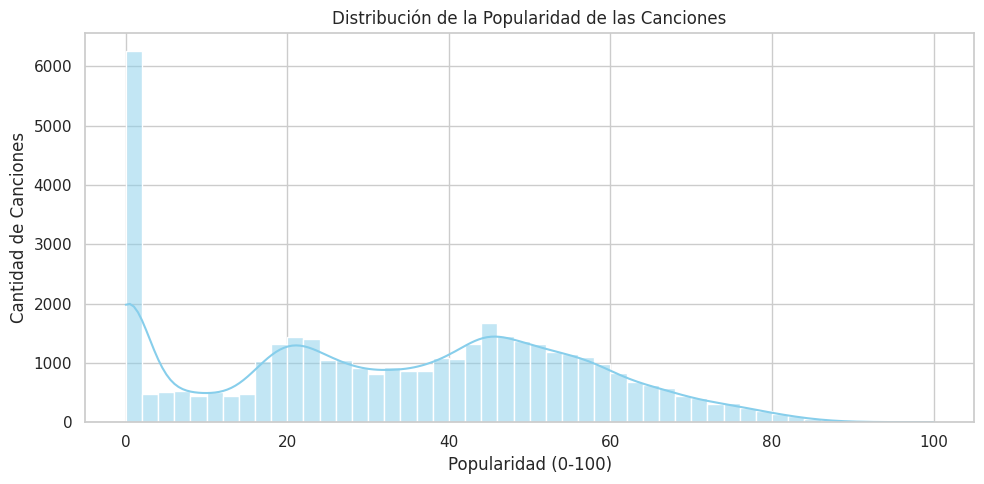

In [16]:
# Verificar si el DataFrame existe antes de graficar


# 1. Distribución de Popularidad (Histograma)
logging.info("Graficando: 1. Distribución de Popularidad")
plt.figure(figsize=(10, 5))
sns.histplot(data=df_spotify, x='popularity', bins=50, kde=True, color='skyblue')
plt.title('Distribución de la Popularidad de las Canciones')
plt.xlabel('Popularidad (0-100)')
plt.ylabel('Cantidad de Canciones')
plt.tight_layout()
plt.show()

2025-04-11 12:29:12,120 - INFO - Graficando: 2. Distribución de Duración (ms)


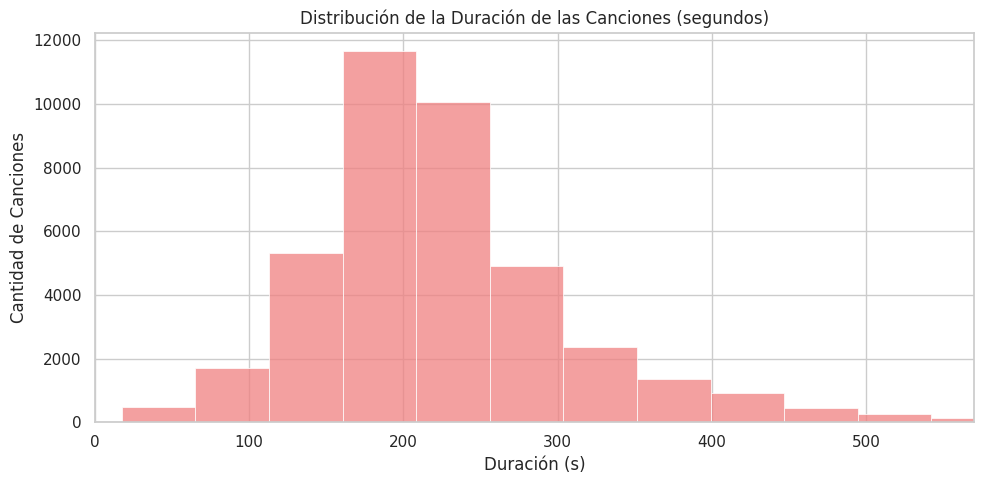

Nota: Eje X limitado al percentil 99 (570s) para mejor visualización.


In [17]:
# 2. Distribución de Duración (ms) (Histograma - puede requerir ajuste/log)
logging.info("Graficando: 2. Distribución de Duración (ms)")
plt.figure(figsize=(10, 5))
# Graficar en segundos para mejor escala
duration_sec = df_spotify['duration_ms'] / 1000
sns.histplot(duration_sec, bins=100, kde=False, color='lightcoral')
plt.title('Distribución de la Duración de las Canciones (segundos)')
plt.xlabel('Duración (s)')
plt.ylabel('Cantidad de Canciones')
plt.xlim(0, duration_sec.quantile(0.99)) # Limitar eje x para ver mejor la mayoría
plt.tight_layout()
plt.show()
print(f"Nota: Eje X limitado al percentil 99 ({duration_sec.quantile(0.99):.0f}s) para mejor visualización.")

2025-04-11 12:29:12,384 - INFO - Graficando: 3. Distribución de Danceability


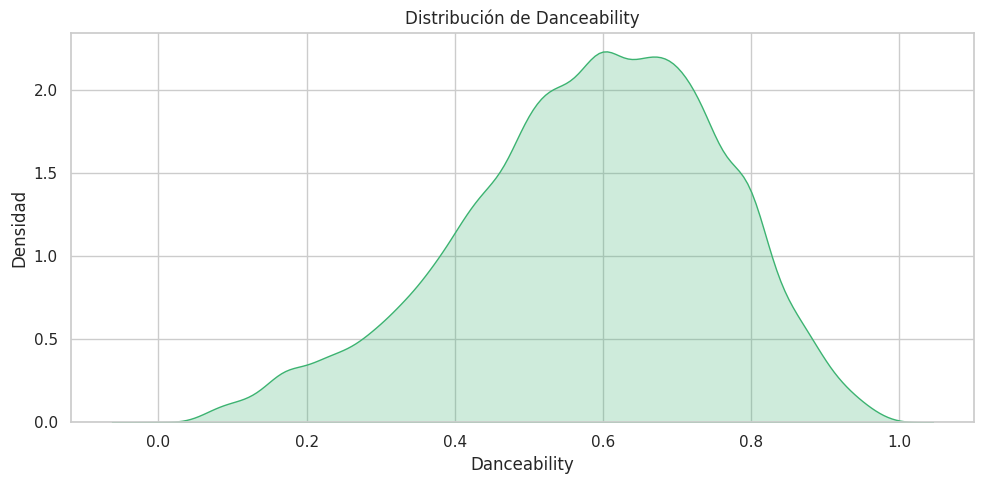

In [18]:
# 3. Distribución de Danceability (KDE Plot)
logging.info("Graficando: 3. Distribución de Danceability")
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_spotify, x='danceability', fill=True, color='mediumseagreen')
plt.title('Distribución de Danceability')
plt.xlabel('Danceability')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

2025-04-11 12:29:12,685 - INFO - Graficando: 4. Distribución de Energy


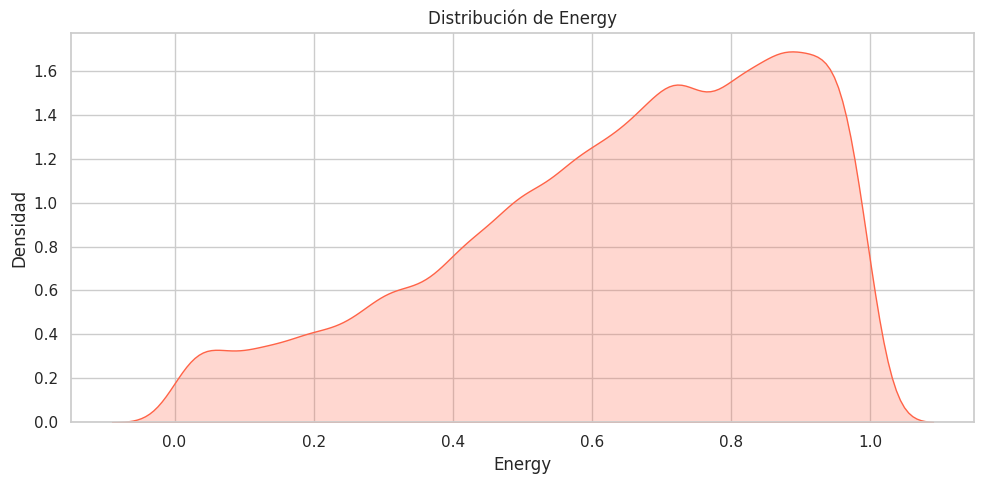

In [19]:
# 4. Distribución de Energy (KDE Plot)
logging.info("Graficando: 4. Distribución de Energy")
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_spotify, x='energy', fill=True, color='tomato')
plt.title('Distribución de Energy')
plt.xlabel('Energy')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

2025-04-11 12:29:13,001 - INFO - Graficando: 5. Distribución de Loudness (dB)


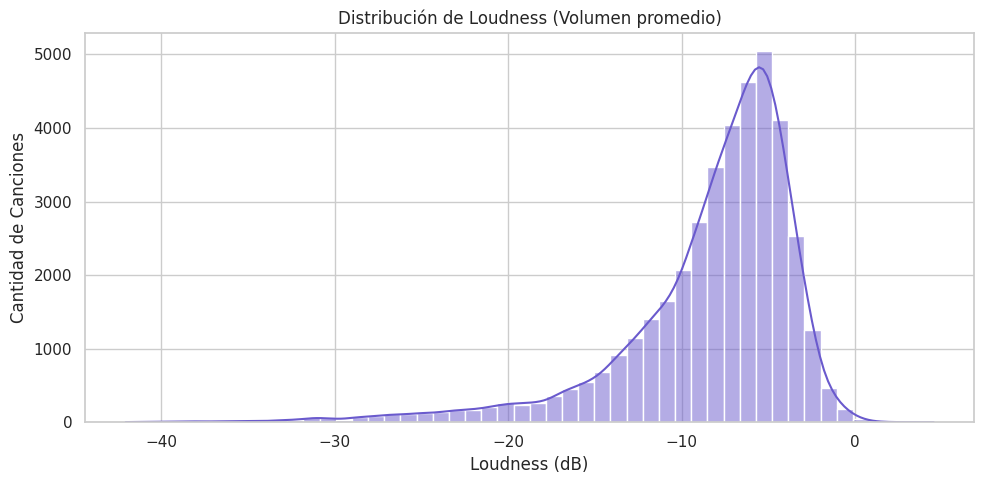

In [20]:
# 5. Distribución de Loudness (Histograma)
logging.info("Graficando: 5. Distribución de Loudness (dB)")
plt.figure(figsize=(10, 5))
sns.histplot(data=df_spotify, x='loudness', bins=50, kde=True, color='slateblue')
plt.title('Distribución de Loudness (Volumen promedio)')
plt.xlabel('Loudness (dB)')
plt.ylabel('Cantidad de Canciones')
plt.tight_layout()
plt.show()

2025-04-11 12:29:13,401 - INFO - Graficando: 6. Distribución de Speechiness


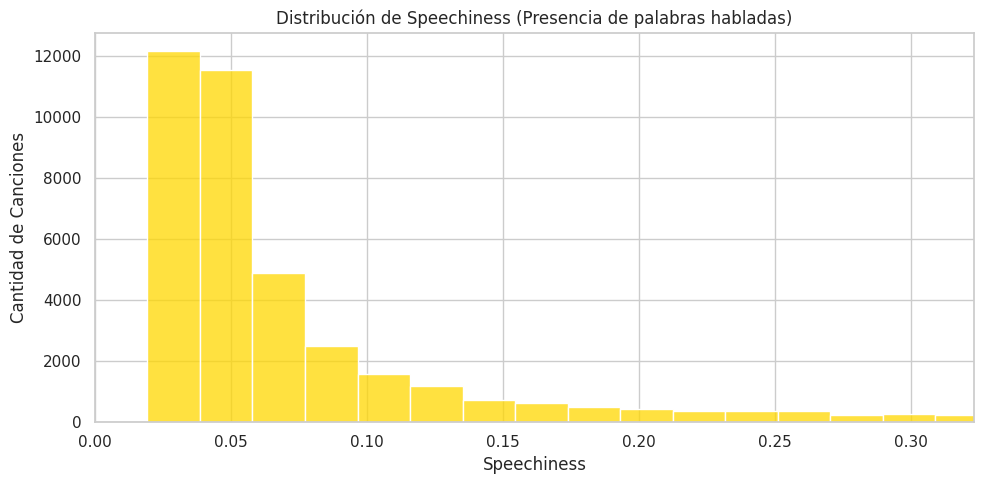

Nota: Eje X limitado al percentil 95 (0.323) para mejor visualización.


In [21]:
# 6. Distribución de Speechiness (Histograma - Log scale puede ser útil)
logging.info("Graficando: 6. Distribución de Speechiness")
plt.figure(figsize=(10, 5))
sns.histplot(data=df_spotify, x='speechiness', bins=50, kde=False, color='gold')
plt.title('Distribución de Speechiness (Presencia de palabras habladas)')
plt.xlabel('Speechiness')
plt.ylabel('Cantidad de Canciones')
plt.xlim(0, df_spotify['speechiness'].quantile(0.95)) # Limitar para ver mejor
plt.tight_layout()
plt.show()
print(f"Nota: Eje X limitado al percentil 95 ({df_spotify['speechiness'].quantile(0.95):.3f}) para mejor visualización.")


2025-04-11 12:29:13,585 - INFO - Graficando: 7. Distribución de Acousticness


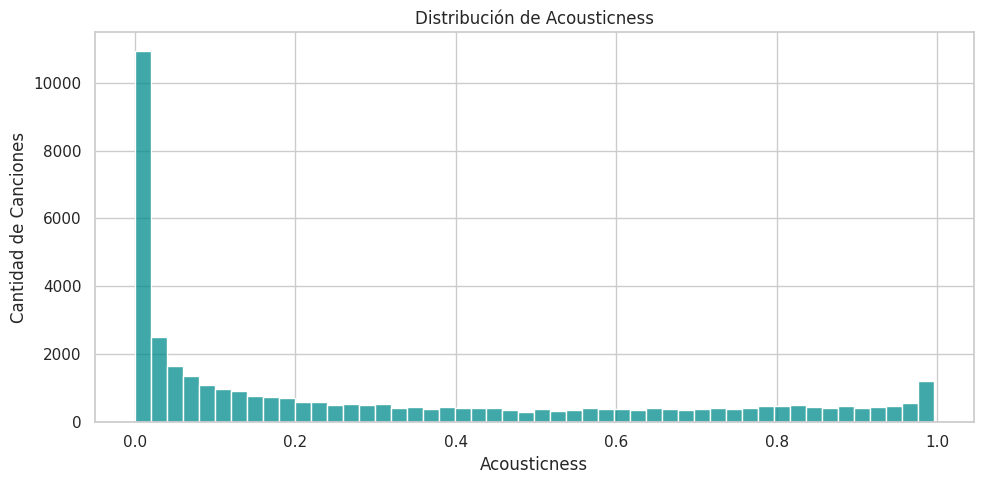

In [22]:
# 7. Distribución de Acousticness (Histograma)
logging.info("Graficando: 7. Distribución de Acousticness")
plt.figure(figsize=(10, 5))
sns.histplot(data=df_spotify, x='acousticness', bins=50, kde=False, color='darkcyan')
plt.title('Distribución de Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Cantidad de Canciones')
plt.tight_layout()
plt.show()

2025-04-11 12:29:13,762 - INFO - Graficando: 8. Distribución de Instrumentalness


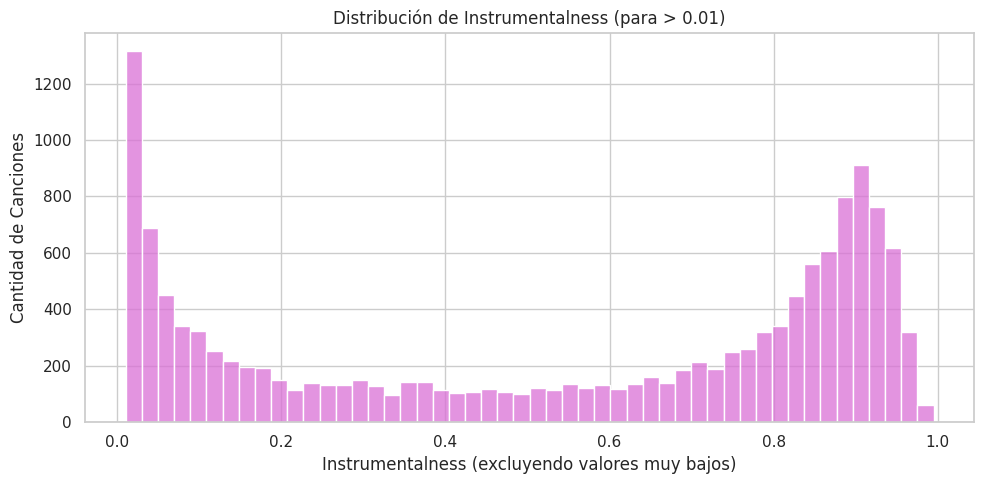

Nota: Se graficaron solo valores > 0.01 para visualizar mejor las canciones instrumentales.


In [23]:
# 8. Distribución de Instrumentalness (Histograma - Probablemente muchos ceros)
logging.info("Graficando: 8. Distribución de Instrumentalness")
plt.figure(figsize=(10, 5))
# Es útil ver la proporción de canciones NO instrumentales (cercanas a 0)
sns.histplot(df_spotify[df_spotify['instrumentalness'] > 0.01]['instrumentalness'], bins=50, kde=False, color='orchid')
plt.title('Distribución de Instrumentalness (para > 0.01)')
plt.xlabel('Instrumentalness (excluyendo valores muy bajos)')
plt.ylabel('Cantidad de Canciones')
plt.tight_layout()
plt.show()
print("Nota: Se graficaron solo valores > 0.01 para visualizar mejor las canciones instrumentales.")

2025-04-11 12:29:13,965 - INFO - Graficando: 9. Distribución de Liveness


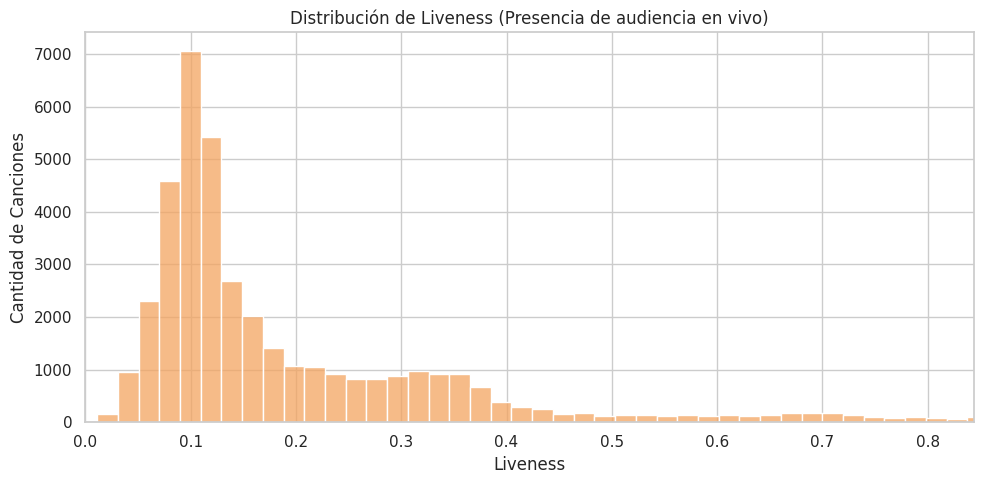

Nota: Eje X limitado al percentil 98 (0.844) para mejor visualización.


In [24]:
# 9. Distribución de Liveness (Histograma)
logging.info("Graficando: 9. Distribución de Liveness")
plt.figure(figsize=(10, 5))
sns.histplot(data=df_spotify, x='liveness', bins=50, kde=False, color='sandybrown')
plt.title('Distribución de Liveness (Presencia de audiencia en vivo)')
plt.xlabel('Liveness')
plt.ylabel('Cantidad de Canciones')
plt.xlim(0, df_spotify['liveness'].quantile(0.98)) # Limitar para ver mejor
plt.tight_layout()
plt.show()
print(f"Nota: Eje X limitado al percentil 98 ({df_spotify['liveness'].quantile(0.98):.3f}) para mejor visualización.")


2025-04-11 12:29:14,167 - INFO - Graficando: 10. Distribución de Valence


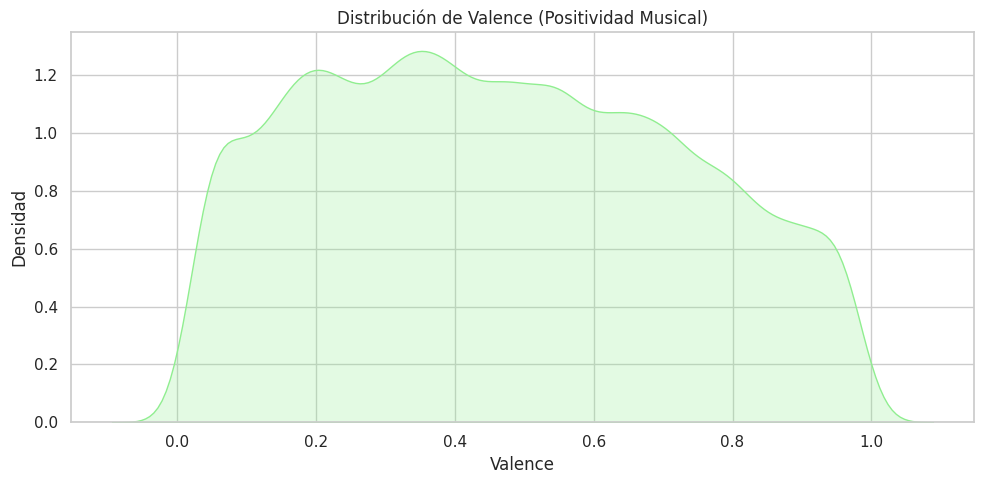

In [25]:
# 10. Distribución de Valence (KDE Plot - Felicidad/Positividad)
logging.info("Graficando: 10. Distribución de Valence")
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_spotify, x='valence', fill=True, color='lightgreen')
plt.title('Distribución de Valence (Positividad Musical)')
plt.xlabel('Valence')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

2025-04-11 12:29:14,476 - INFO - Graficando: 11. Distribución de Tempo (BPM)


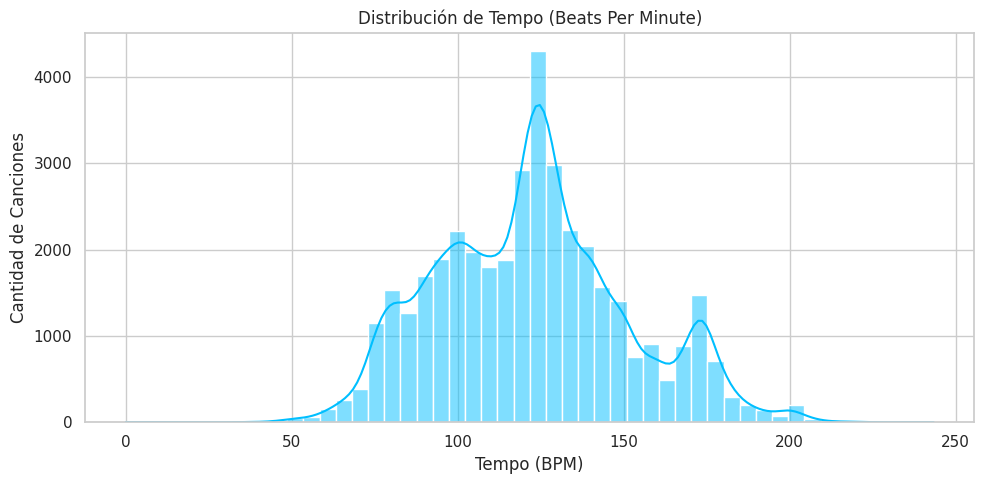

In [26]:
# 11. Distribución de Tempo (Histograma)
logging.info("Graficando: 11. Distribución de Tempo (BPM)")
plt.figure(figsize=(10, 5))
sns.histplot(data=df_spotify, x='tempo', bins=50, kde=True, color='deepskyblue')
plt.title('Distribución de Tempo (Beats Per Minute)')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Cantidad de Canciones')
plt.tight_layout()
plt.show()

2025-04-11 12:29:14,915 - INFO - Graficando: 12. Conteo de Canciones Explícitas


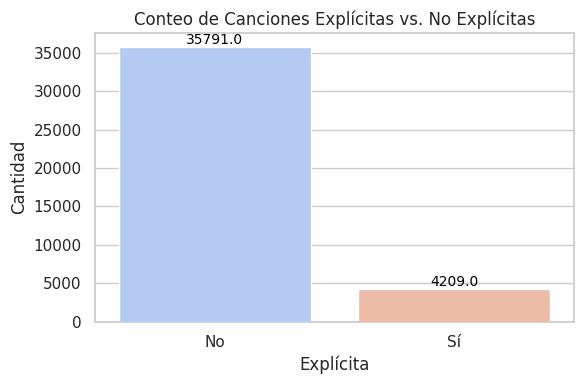

In [27]:
# 12. Conteo de Canciones Explícitas vs. No Explícitas (Bar Plot) - CORREGIDO
logging.info("Graficando: 12. Conteo de Canciones Explícitas")
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_spotify, x='explicit', palette='coolwarm',
                    hue='explicit', legend=False) # <-- Añadido hue y legend
plt.title('Conteo de Canciones Explícitas vs. No Explícitas')
plt.xlabel('Explícita')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()

2025-04-11 12:29:15,069 - INFO - Graficando: 13. Conteo por Tonalidad (Key)


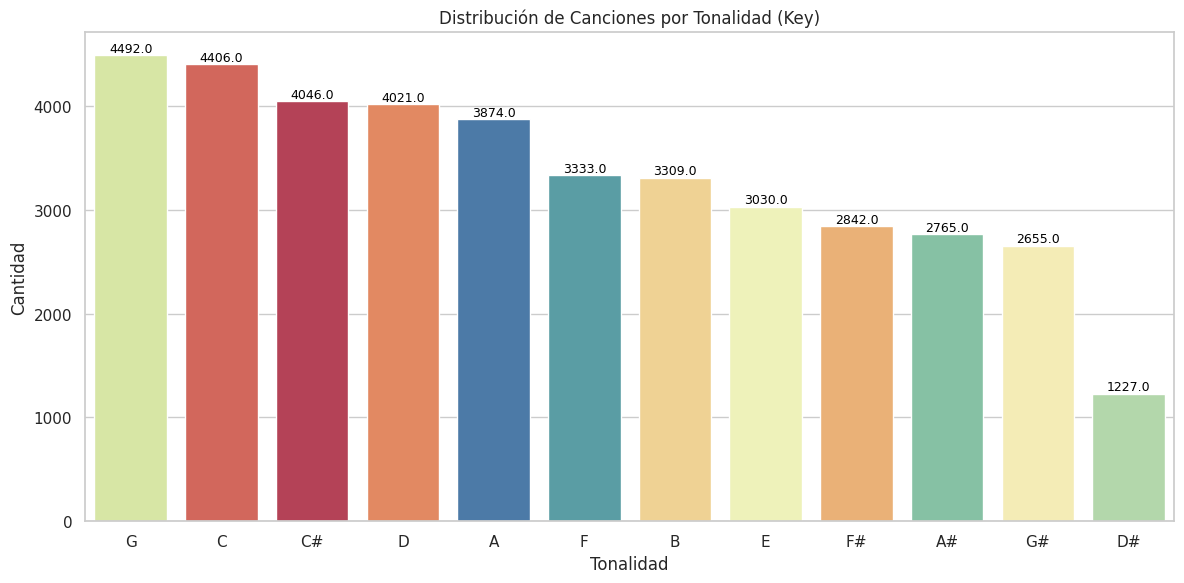

In [28]:
# 13. Conteo por Key (Tonalidad) (Bar Plot) - CORREGIDO
logging.info("Graficando: 13. Conteo por Tonalidad (Key)")
key_map = {0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F', 6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'B'}
df_spotify['key_name'] = df_spotify['key'].map(key_map)
plt.figure(figsize=(12, 6))
key_order = df_spotify['key_name'].value_counts().index
ax = sns.countplot(data=df_spotify, x='key_name', order=key_order, palette='Spectral',
                    hue='key_name', legend=False) # <-- Añadido hue y legend
plt.title('Distribución de Canciones por Tonalidad (Key)')
plt.xlabel('Tonalidad')
plt.ylabel('Cantidad')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()
# df_spotify = df_spotify.drop(columns=['key_name']) # Mantener columna temporal si se usa en la matriz

2025-04-11 12:29:15,354 - INFO - Graficando: 14. Conteo por Modo (Major/Minor)


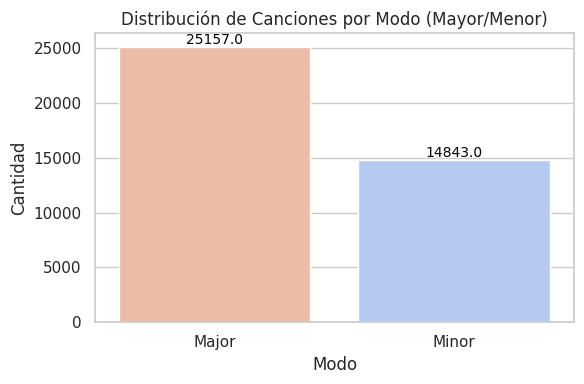

In [29]:
# 14. Conteo por Mode (Mayor/Menor) (Bar Plot) - CORREGIDO
logging.info("Graficando: 14. Conteo por Modo (Major/Minor)")
mode_map = {0: 'Minor', 1: 'Major'}
df_spotify['mode_name'] = df_spotify['mode'].map(mode_map)
plt.figure(figsize=(6, 4))
mode_order = df_spotify['mode_name'].value_counts().index
ax = sns.countplot(data=df_spotify, x='mode_name', order=mode_order, palette='coolwarm',
                    hue='mode_name', legend=False) # <-- Añadido hue y legend
plt.title('Distribución de Canciones por Modo (Mayor/Menor)')
plt.xlabel('Modo')
plt.ylabel('Cantidad')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()
# df_spotify = df_spotify.drop(columns=['mode_name']) # Mantener columna temporal si se usa en la matriz

2025-04-11 12:29:15,518 - INFO - Graficando: 15. Conteo por Compás (Time Signature)
2025-04-11 12:29:15,556 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-11 12:29:15,577 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


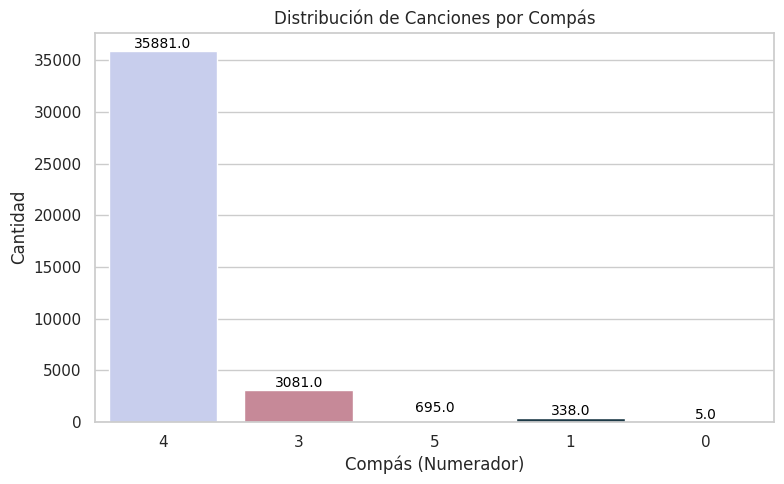

In [30]:
# 15. Conteo por Time Signature (Compás) (Bar Plot) - CORREGIDO
logging.info("Graficando: 15. Conteo por Compás (Time Signature)")
plt.figure(figsize=(8, 5))
ts_order = df_spotify['time_signature'].value_counts().index
ax = sns.countplot(data=df_spotify, x='time_signature', order=ts_order, palette='cubehelix',
                    hue='time_signature', legend=False) # <-- Añadido hue y legend
plt.title('Distribución de Canciones por Compás')
plt.xlabel('Compás (Numerador)')
plt.ylabel('Cantidad')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()

2025-04-11 12:29:15,719 - INFO - 
--- Matriz de Gráficas (3x3) - EDA Resumen Spotify ---


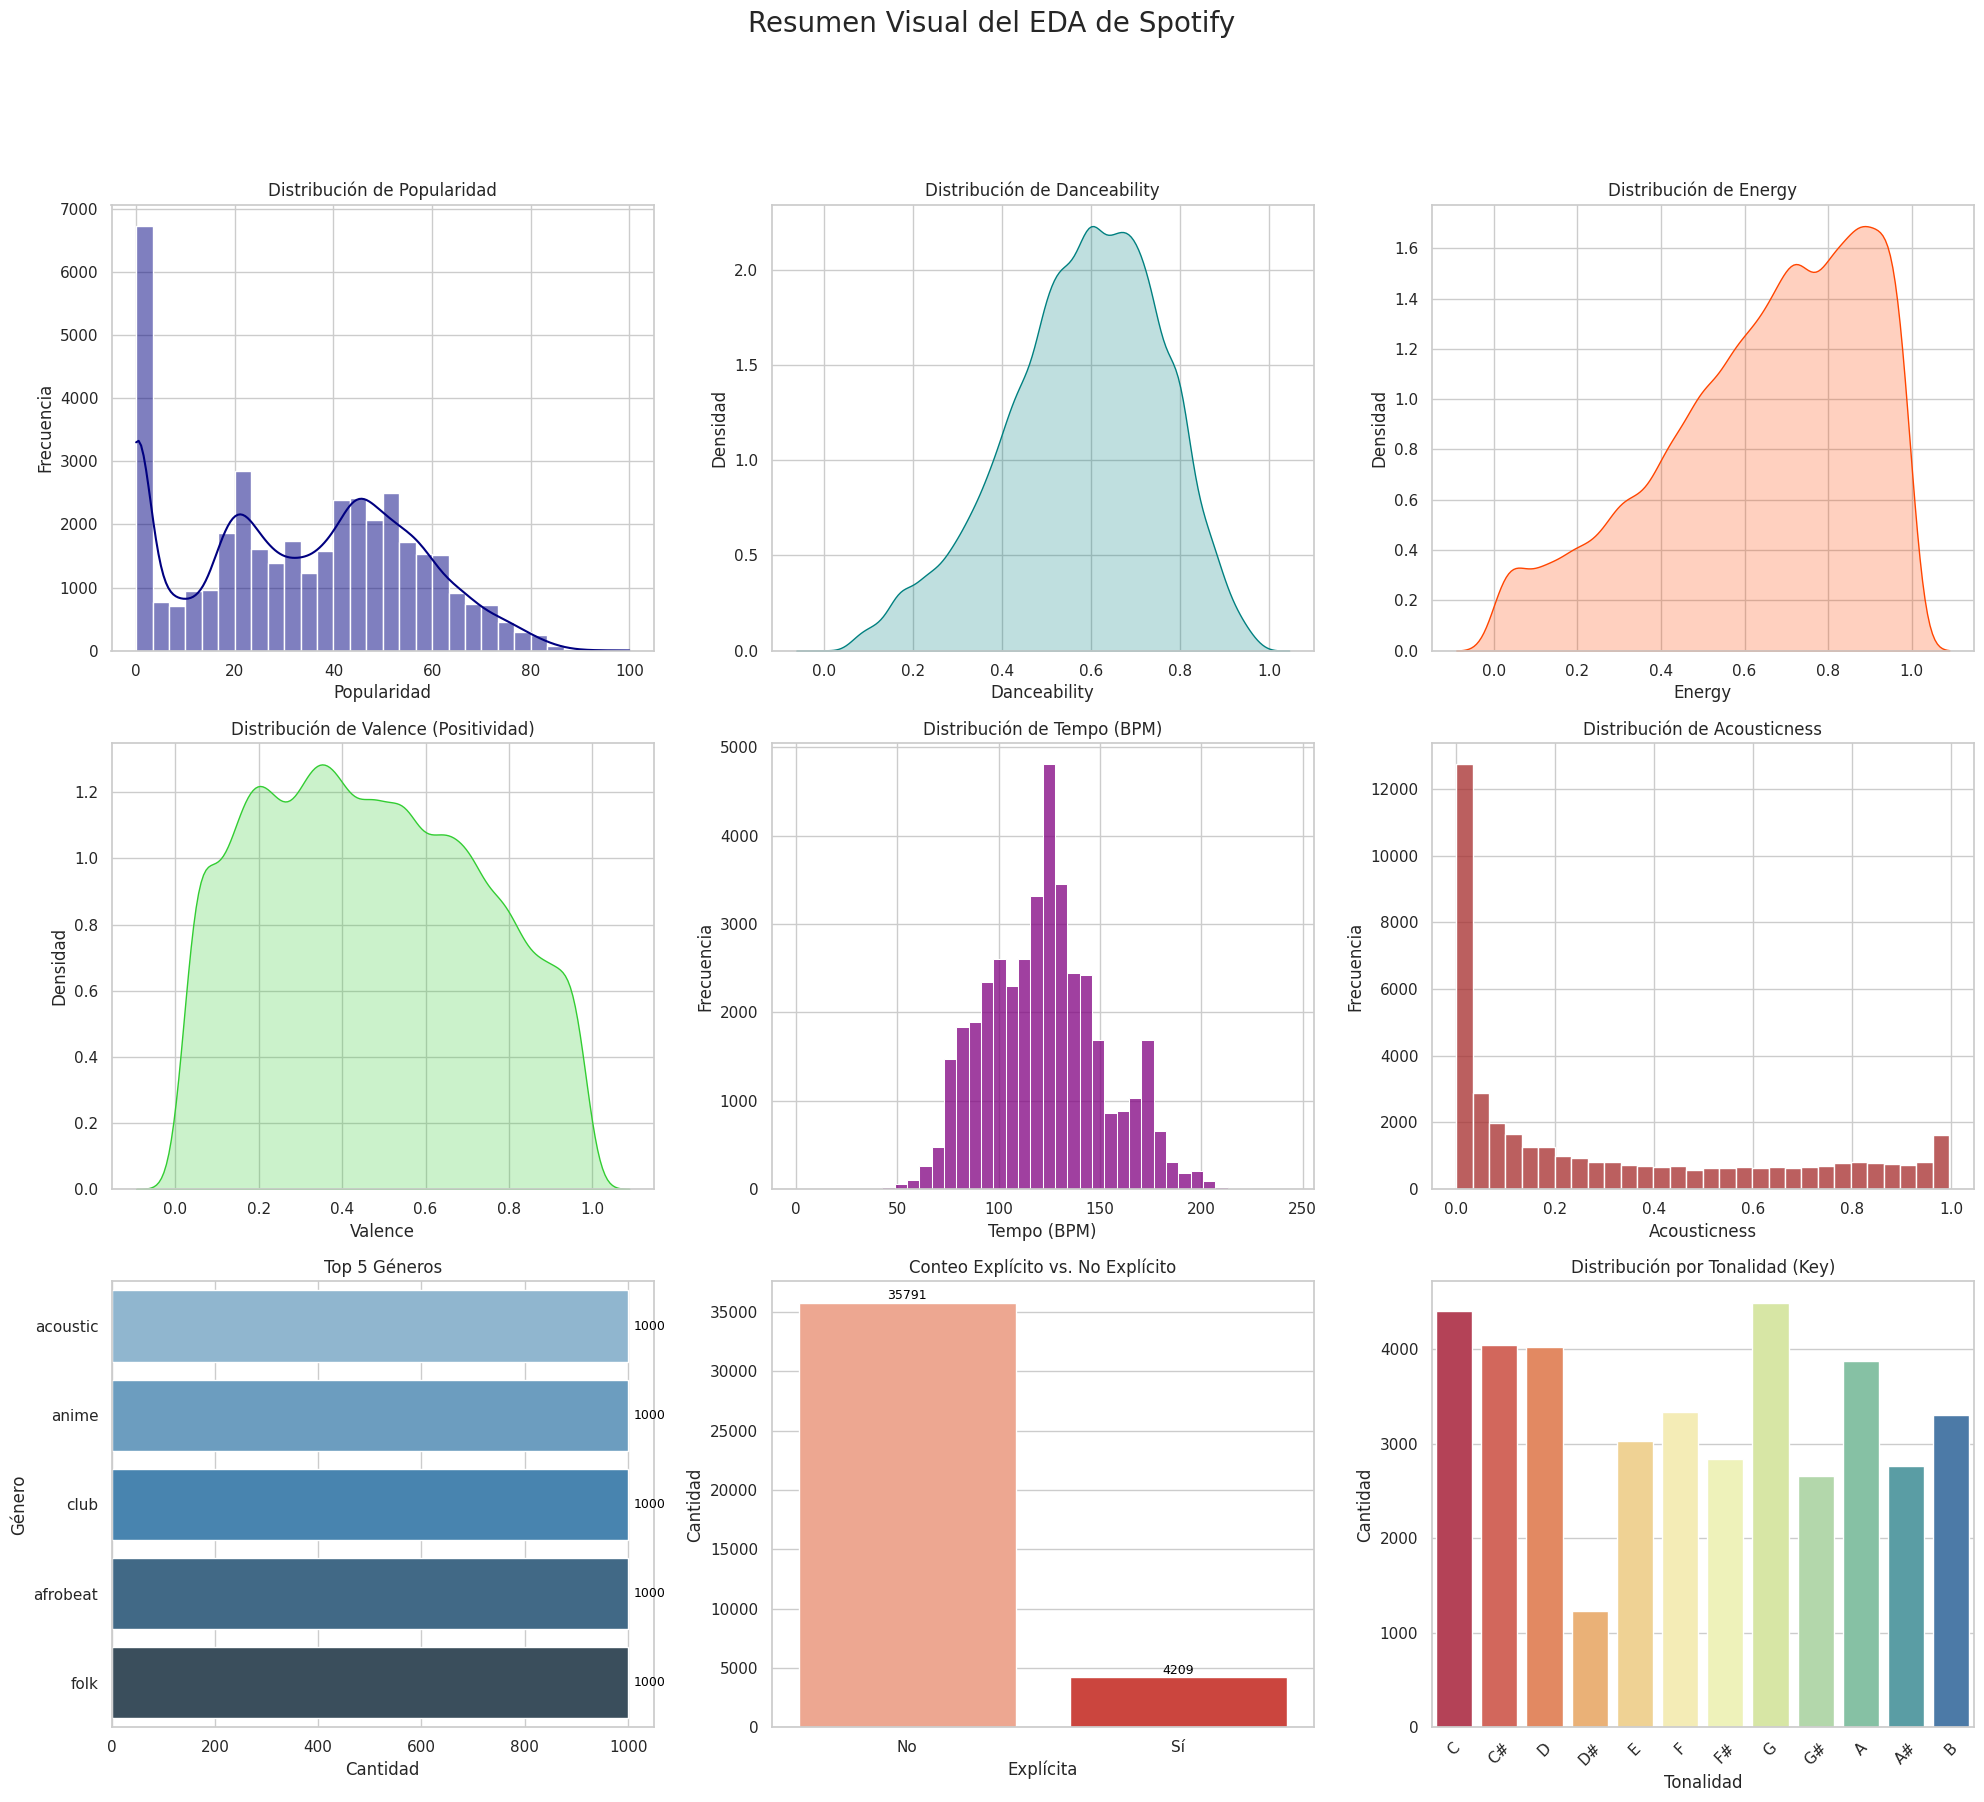

2025-04-11 12:29:17,717 - INFO - 
--- Fin del EDA Visual para Spotify ---


In [31]:
# --- Matriz de Gráficas (3x3 = 9 Gráficos - SIN ADVERTENCIAS v2) ---
if df_spotify is not None:
    logging.info("\n--- Matriz de Gráficas (3x3) - EDA Resumen Spotify ---")
    fig, axes = plt.subplots(3, 3, figsize=(20, 18))
    fig.suptitle('Resumen Visual del EDA de Spotify', fontsize=20, y=1.03)

    # --- Fila 1: Características Principales ---
    # (Gráficos 1, 2, 3 sin cambios respecto a la versión anterior)
    # 1. Popularidad
    sns.histplot(data=df_spotify, x='popularity', bins=30, kde=True, ax=axes[0, 0], color='navy')
    axes[0, 0].set_title('Distribución de Popularidad')
    axes[0, 0].set_xlabel('Popularidad')
    axes[0, 0].set_ylabel('Frecuencia')

    # 2. Danceability
    sns.kdeplot(data=df_spotify, x='danceability', fill=True, ax=axes[0, 1], color='teal')
    axes[0, 1].set_title('Distribución de Danceability')
    axes[0, 1].set_xlabel('Danceability')
    axes[0, 1].set_ylabel('Densidad')

    # 3. Energy
    sns.kdeplot(data=df_spotify, x='energy', fill=True, ax=axes[0, 2], color='orangered')
    axes[0, 2].set_title('Distribución de Energy')
    axes[0, 2].set_xlabel('Energy')
    axes[0, 2].set_ylabel('Densidad')

    # --- Fila 2: Otras Características de Audio ---
    # (Gráficos 4, 5, 6 sin cambios respecto a la versión anterior)
    # 4. Valence
    sns.kdeplot(data=df_spotify, x='valence', fill=True, ax=axes[1, 0], color='limegreen')
    axes[1, 0].set_title('Distribución de Valence (Positividad)')
    axes[1, 0].set_xlabel('Valence')
    axes[1, 0].set_ylabel('Densidad')

    # 5. Tempo
    sns.histplot(data=df_spotify, x='tempo', bins=40, kde=False, ax=axes[1, 1], color='purple')
    axes[1, 1].set_title('Distribución de Tempo (BPM)')
    axes[1, 1].set_xlabel('Tempo (BPM)')
    axes[1, 1].set_ylabel('Frecuencia')

    # 6. Acousticness
    sns.histplot(data=df_spotify, x='acousticness', bins=30, kde=False, ax=axes[1, 2], color='brown')
    axes[1, 2].set_title('Distribución de Acousticness')
    axes[1, 2].set_xlabel('Acousticness')
    axes[1, 2].set_ylabel('Frecuencia')

    # --- Fila 3: Características Categóricas ---
    # (Gráfico 7 sin cambios respecto a la versión anterior)
    # 7. Top 5 Géneros
    n_top_genres_matrix = 5
    top_genres_matrix = df_spotify['track_genre'].value_counts().nlargest(n_top_genres_matrix).reset_index()
    top_genres_matrix.columns = ['track_genre', 'count']
    sns.barplot(data=top_genres_matrix, y='track_genre', x='count', ax=axes[2, 0], palette='Blues_d', orient='h',
                hue='track_genre', legend=False)
    axes[2, 0].set_title(f'Top {n_top_genres_matrix} Géneros')
    axes[2, 0].set_xlabel('Cantidad')
    axes[2, 0].set_ylabel('Género')
    for i, v in enumerate(top_genres_matrix['count']):
        axes[2, 0].text(v + 10, i, str(v), color='black', va='center', fontsize=9)

    # 8. Conteo Explícito (Añadir set_xticks)
    sns.countplot(data=df_spotify, x='explicit', ax=axes[2, 1], palette='Reds',
                  hue='explicit', legend=False)
    axes[2, 1].set_title('Conteo Explícito vs. No Explícito')
    axes[2, 1].set_xlabel('Explícita')
    axes[2, 1].set_ylabel('Cantidad')
    # --- Modificación aquí ---
    axes[2, 1].set_xticks([0, 1]) # Establecer explícitamente las posiciones de los ticks
    # ----------------------
    axes[2, 1].set_xticklabels(['No', 'Sí']) # Ahora esto no debería generar advertencia
    for p in axes[2, 1].patches:
        axes[2, 1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                            textcoords='offset points')

    # (Gráfico 9 sin cambios respecto a la versión anterior)
    # 9. Conteo por Tonalidad (Key)
    key_map_matrix = {0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F', 6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'B'}
    if 'key_name' in df_spotify.columns:
        key_data = df_spotify['key_name'].value_counts().reindex(key_map_matrix.values())
        sns.barplot(x=key_data.index, y=key_data.values, ax=axes[2, 2], palette='Spectral',
                    hue=key_data.index, legend=False)
        axes[2, 2].set_title('Distribución por Tonalidad (Key)')
        axes[2, 2].set_xlabel('Tonalidad')
        axes[2, 2].set_ylabel('Cantidad')
        axes[2, 2].tick_params(axis='x', rotation=45)
    else:
        # Asegurarse de que key_map_matrix esté definida incluso si 'key_name' no existe
        # Esto previene un error si la celda anterior no se ejecutó
        # key_map_matrix = {0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F', 6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'B'}
        axes[2, 2].text(0.5, 0.5, "Columna 'key_name' no encontrada", ha='center', va='center')
        axes[2, 2].set_title('Distribución por Tonalidad (Key)')


    # Ajuste final y mostrar
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

else:
    logging.warning("DataFrame df_spotify no disponible para la Matriz de Gráficas.")


logging.info("\n--- Fin del EDA Visual para Spotify ---")